# 初始工作：建環境

1.   電腦建環境
2.   打開環境
1.   裝pandas

In [2]:
# conda create -n netflix-project
# conda activate netflix-project
# conda install anaconda::pandas
!pip install tabulate==0.9.0

In [1]:
# 連接Github，clone下來
!git clone https://github.com/tylin23/netflix-analysis.git

Cloning into 'netflix-analysis'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 31 (delta 9), reused 18 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (31/31), 10.52 MiB | 9.16 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
#連接雲端資料夾
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 一、把三份資料都讀進來，看裡面資料狀態

In [3]:
import pandas as pd
from tabulate import tabulate
import os

# 讀取「原始資料集的資料夾」內的所有 CSV 檔案，並分析每個檔案的內容
folder_path = '/content/netflix-analysis/netflix_data'
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)

    # 顯示欄位名稱
    print(f"\n{file} Columns:")
    print(df.columns.tolist())

    # 檢查資料集的結構與簡介
    info = df.info()
    head = df.head()

    # 將結果打印出來
    print(f"\n{file} DataFrame Info:")
    print(info)
    print(f"\n{file} DataFrame Head:")
    print(tabulate(head, headers='keys', tablefmt='psql'))



netflix_titles_1925-2021_train.csv Columns:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

netflix_titles_1925-2021_train.csv DataFrame Info:
None

netflix_t

# 二、統一欄位命名規則，以利未來使用

每個檔案的資料很亂，先來進行欄位名稱調整，統一命名規則。
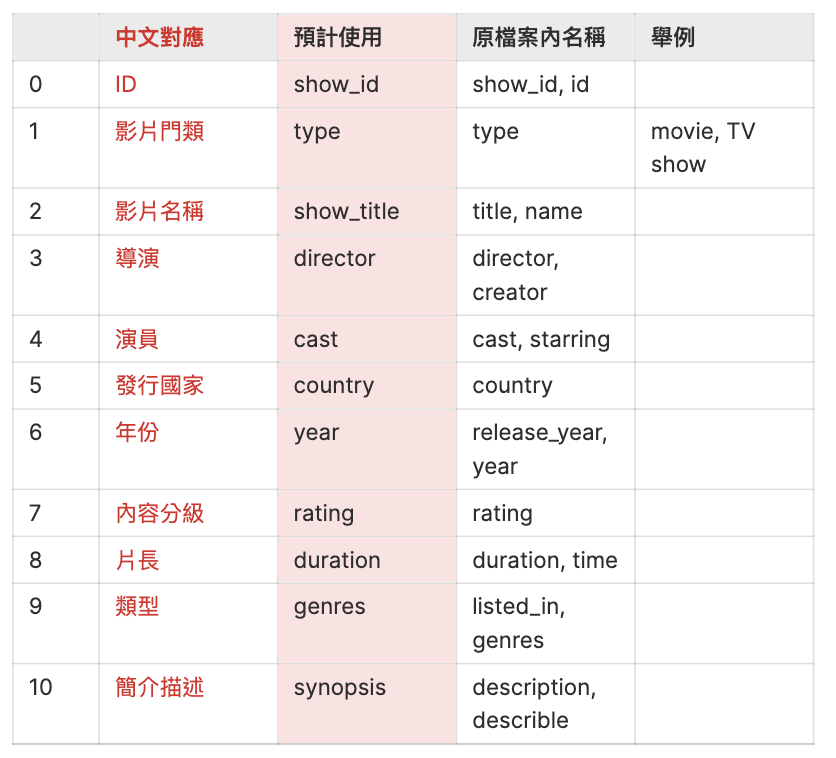

In [4]:
# 將兩個csv檔案存到df1和df2
df1 = pd.read_csv('/content/netflix-analysis/netflix_data/netflix_titles_1925-2021_train.csv')
df2 = pd.read_csv('/content/netflix-analysis/netflix_data/netflix_full_2021-2023.csv')

# 改欄位名稱For df1
df1 = df1.rename(columns={'title': 'show_title', 'release_year': 'year', 'listed_in': 'genres', 'description': 'synopsis'})

# 改欄位名稱For df2
df2 = df2.rename(columns={'id': 'show_id', 'name': 'show_title', 'creator': 'director', 'starring': 'cast', 'time': 'duration', 'describle': 'synopsis'})
# 印出df1的欄位名稱和前五筆head資料
print("\ndf1 Columns:")
print(df1.columns.tolist())
print("\ndf1 Head:")
print(df1.head())

# 印出df2的欄位名稱和前五筆head資料
print("\n\ndf2 Columns:")
print(df2.columns.tolist())
print("\n\ndf2 Head:")
print(df2.head())


df1 Columns:
['show_id', 'type', 'show_title', 'director', 'cast', 'country', 'date_added', 'year', 'rating', 'duration', 'genres', 'synopsis']

df1 Head:
  show_id     type             show_title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  year rating   duratio

# 三、處理缺失值、刪除後覆蓋表格、檢查筆數

In [5]:
# 刪除 df1 中包含缺失值的筆數 # 直接在原地刪除缺失值的行
df1_cleaned = df1.dropna()

# 刪除 df2 中包含缺失值的筆數 # 直接在原地刪除缺失值的行
df2_cleaned = df2.dropna()

# 印出清理後的 DataFrame結果(各自前五筆)
print("df1 after dropna:")
print(tabulate(df1_cleaned.head(), headers='keys', tablefmt='psql'))
print(len(df1_cleaned))

print("df2 after dropna:")
print(tabulate(df2_cleaned.head(), headers='keys', tablefmt='psql'))
print(len(df2_cleaned))

df1 after dropna:
+----+-----------+---------+-------------------------------+---------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------+--------------------+--------+----------+------------+--------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------+
|    | show_id   | type    | show_title                    | director            | cast                                                                                                                                                                    | country                                                               | date_added         |   year | rating   | duration   | genres             